# Numerical Exercise 11

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


## Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

## Resolution
To complete this task, we'll explore the performance with every combination of the following parameters:
- $N_{\mathrm{epochs}} = 30, 60 \text{ and } 100$
- $N_{\mathrm{train}} = 500, 1000 \text{ and } 1500$
- $\sigma = 0.0, 0.3, 0.5 \text{ and } 1.0$

The results will be shown in the following plots, alongside the printed scores.

In [8]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [9]:
vsigma = [0.0, 0.3, 0.5, 1.0]
vpoints = [500, 1000, 1500]
vepoch = [30, 60, 100]
vscore_val = []
vscore_tar = []
vweight = []
vloss = []
vval_loss = []
np.random.seed(0)
models = []
history = []
counter = 0
for sigma in vsigma:
  for points in vpoints:
    for epo in vepoch:
      x_train = np.random.uniform(-1, 1, points)
      x_valid = np.random.uniform(-1, 1, int(points/10))
      x_valid.sort()
      y_target = m * x_valid + b # ideal (target) linear function

      y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
      y_valid = np.random.normal(m * x_valid + b, sigma)

      models.append(tf.keras.Sequential())
      models[counter].add(Dense(1, input_shape=(1,)))
      models[counter].compile(optimizer='sgd', loss='mse', metrics=['mse'])
      history.append(models[counter].fit(x=x_train, y=y_train, batch_size=32, epochs=epo, shuffle=True, validation_data=(x_valid, y_valid)))

      score = models[counter].evaluate(x_valid, y_valid, batch_size=32)
      vscore_val.append(score)
      score_target = models[counter].evaluate(x_valid, y_target, batch_size=32)
      vscore_tar.append(score_target)
      weight = models[counter].get_weights()
      vweight.append(weight)
      vloss.append(history[counter].history['loss'])
      vval_loss.append(history[counter].history['val_loss'])
      counter += 1



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0158 - mse: 2.0170 - val_loss: 1.6664 - val_mse: 1.3244
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3714 - mse: 1.3705 - val_loss: 1.1624 - val_mse: 0.9375
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9252 - mse: 0.9248 - val_loss: 0.8376 - val_mse: 0.6894
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7508 - mse: 0.7503 - val_loss: 0.6194 - val_mse: 0.5217
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5172 - mse: 0.5176 - val_loss: 0.4703 - val_mse: 0.4050
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4268 - mse: 0.4270 - val_loss: 0.3631 - val_mse: 0.3187
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3573 - mse: 0.3575 - val_loss: 0.2834 - val_mse: 0.2531
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2649 - mse: 0.2651 - val_loss: 0.2227 - val_mse: 0.2019
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2028 - mse: 0.2028 - v

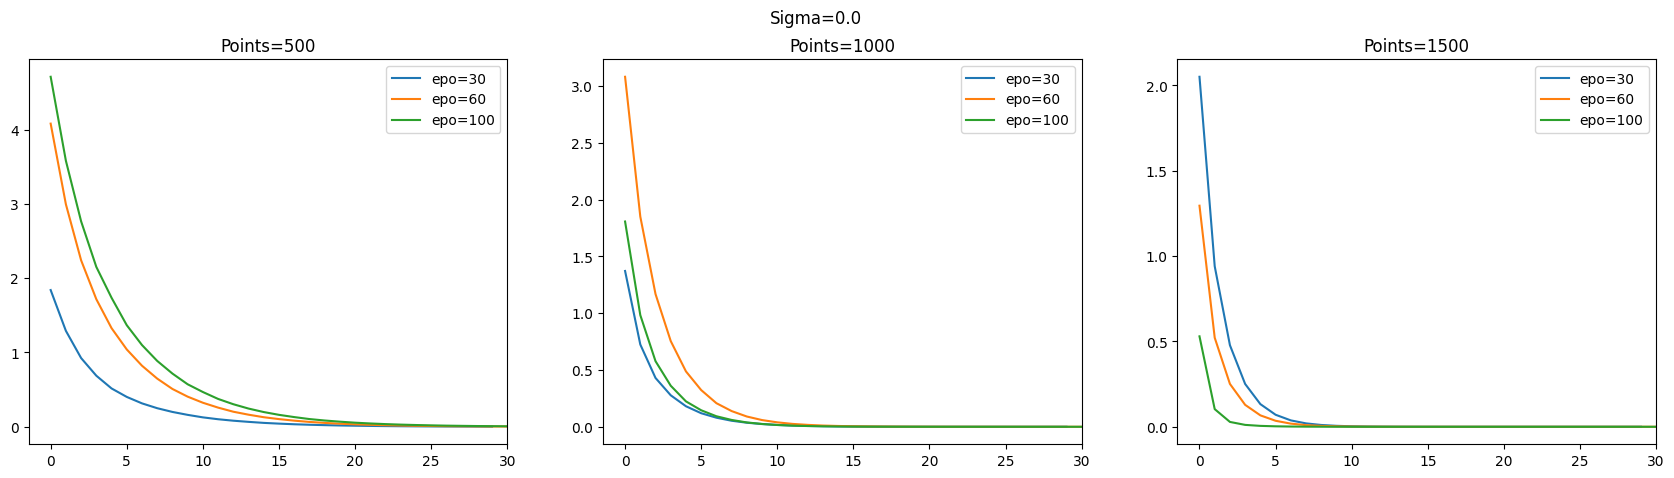

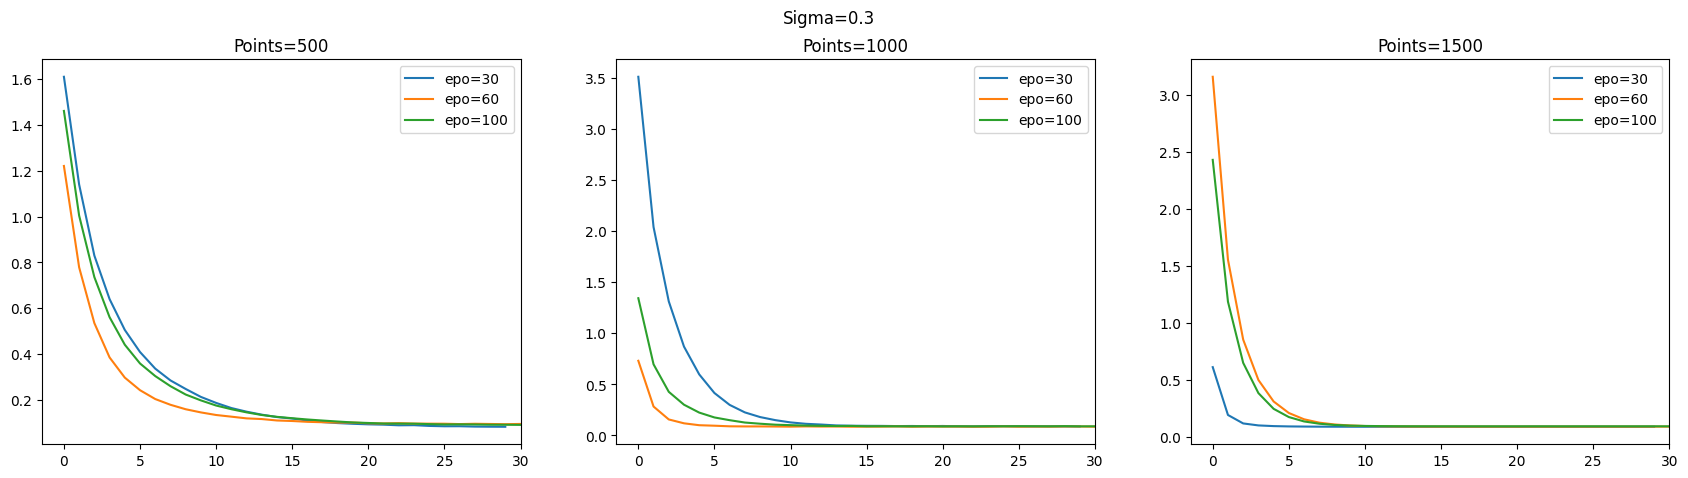

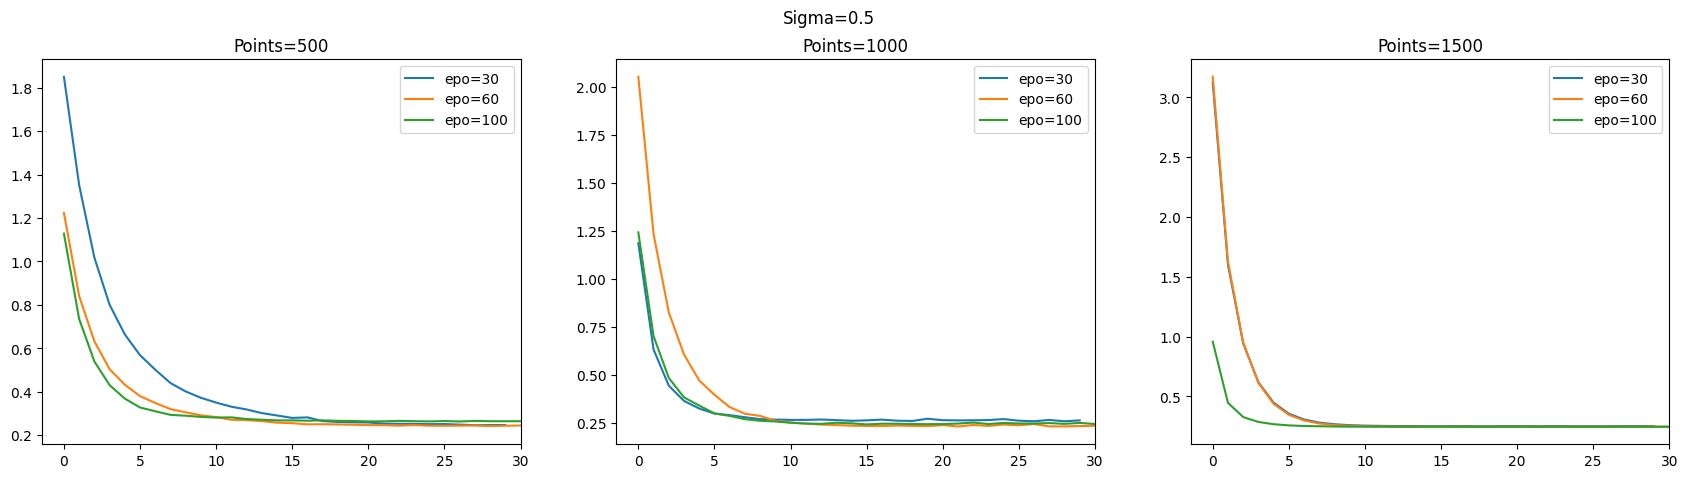

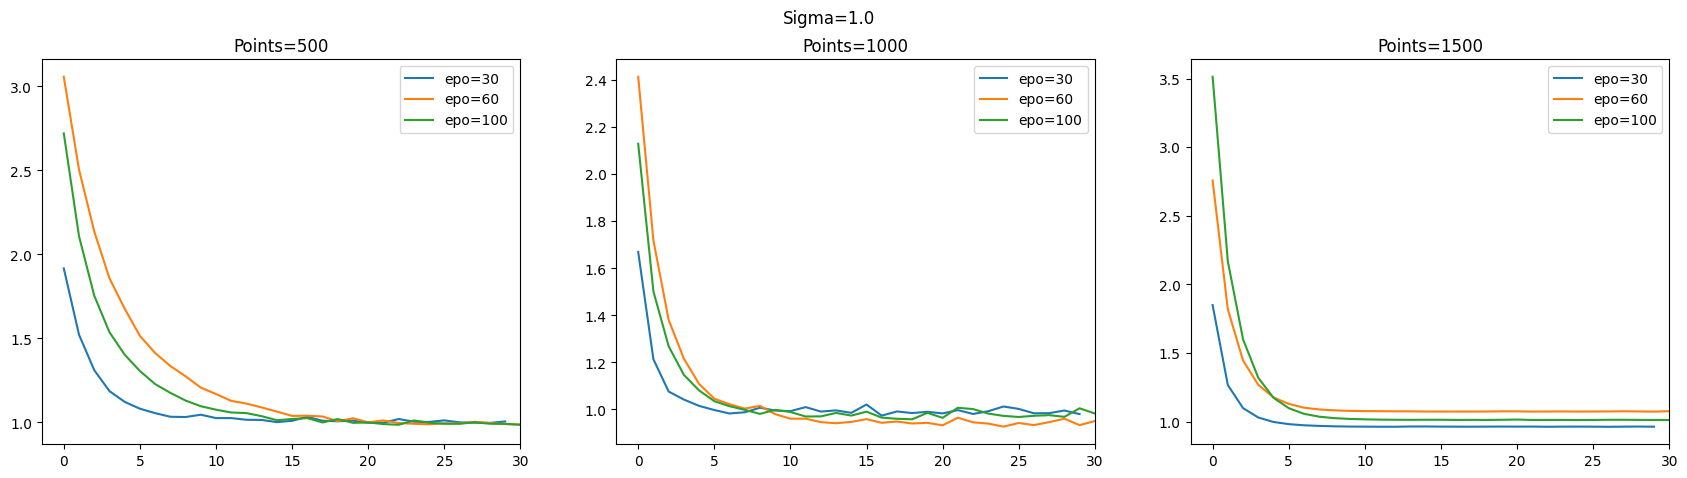

Sigma	Points	Epochs	m	b	Loss	Acc	Loss_exact	Acc_exact
0.0	500  	30   	1.92787	0.99910	0.0017031	0.0016539	   0.00170	0.00165
0.0	500  	60   	1.99662	1.00014	0.0000046	0.0000042	   0.00000	0.00000
0.0	500  	100  	1.99991	1.00000	0.0000000	0.0000000	   0.00000	0.00000
0.0	1000 	30   	1.99564	0.99982	0.0000090	0.0000065	   0.00001	0.00001
0.0	1000 	60   	1.99999	1.00000	0.0000000	0.0000000	   0.00000	0.00000
0.0	1000 	100  	1.99999	1.00000	0.0000000	0.0000000	   0.00000	0.00000
0.0	1500 	30   	1.99980	0.99999	0.0000000	0.0000000	   0.00000	0.00000
0.0	1500 	60   	1.99999	1.00000	0.0000000	0.0000000	   0.00000	0.00000
0.0	1500 	100  	1.99999	1.00000	0.0000000	0.0000000	   0.00000	0.00000
0.3	500  	30   	1.94795	0.98501	0.0596411	0.0561946	   0.00128	0.00101
0.3	500  	60   	2.01692	1.02042	0.1009651	0.1007988	   0.00063	0.00054
0.3	500  	100  	2.00617	1.00908	0.0737363	0.0677271	   0.00011	0.00009
0.3	1000 	30   	1.97184	1.00559	0.0819630	0.0980853	   0.00038	0.00035
0.3	1000 	60   	1.99956

In [14]:
counter = 0
for sigma in vsigma:
  plt.figure(figsize=(21,5))
  sp = []
  for i, points in enumerate(vpoints):
    for j, epo in enumerate(vepoch):
      plt.subplot(1,3,i+1)
      plt.title("Points={p}".format(p=points))
      plt.plot(vloss[counter], label="epo={e}".format(e=epo))
      #plt.plot(vval_loss[counter], label="val epo={e}".format(e=epo))
      #print("Sigma = {s}, Points = {p}, Epochs = {e}".format(s=sigma, p=points, e=epo))
      #print("m = {m}, b = {b}".format(m=vweight[counter][0][0][0], b=vweight[counter][1][0]))
      #print("Test validation: loss = {l}, acc = {a}".format(l=vscore_val[counter][0], a=vscore_val[counter][0]))
      #print("Test exact     : loss = {l}, acc = {a}".format(l=vscore_tar[counter][0], a=vscore_tar[counter][0]))
      counter += 1
      plt.xlim(right=30)
      plt.legend()
  plt.suptitle("Sigma={s}".format(s=sigma))
  plt.show()

# print table with results: sigma, points, epochs, m, b, loss, acc
counter = 0
print("Sigma\tPoints\tEpochs\tm\tb\tLoss\tAcc\tLoss_exact\tAcc_exact")
for sigma in vsigma:
  for points in vpoints:
    for epo in vepoch:
      print("{s:.1f}\t{p:<5}\t{e:<5}\t{m:.5f}\t{b:.5f}\t{l:.7f}\t{a:.7f}\t{l_e:10.5f}\t{a_e:.5f}".format(s=sigma, p=points, e=epo, m=vweight[counter][0][0][0], b=vweight[counter][1][0], l=vscore_val[counter][0], a=vscore_val[counter][1], l_e=vscore_tar[counter][0], a_e=vscore_tar[counter][1]))
      counter += 1




## Some observations
We can see from the plots and data, that:
- The number $N_{\mathrm{epochs}}$ when the number of data points is larger does not matter much, as the model converges in a few epochs. When $N_{train}$ is lower, a higher number of epochs can help.
- The number of data points $N_{\mathrm{train}}$ affects the performance of the model. The more data points, the better the model.
- The noise $\sigma$ also affects the performance of the model. A right amount of noise can help the model to generalize better.